In [76]:
import logging
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import Callback
from keras.utils import to_categorical

In [77]:
# Function to compute and save statistics
def save_model_statistics(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 100 + "\n")
        f.write(f"{stage}:\n\n")
        for i in range(32):
            mean = np.mean(filters[:, :, 0, i])
            variance = np.var(filters[:, :, 0, i])
            f.write(f"Kernel {i + 1} Weights:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

            mean = np.mean(biases[i])
            variance = np.var(biases[i])
            f.write(f"Kernel {i + 1} Biases:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

# Function to save weights
def save_model_weights(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 10 + "\n")
        f.write(f"\n{stage}:\n")
        for i in range(32):
            x = (filters[:, :, 0, i])
            y = (biases[i])
            f.write(f"Kernel {i + 1}\n")
            f.write(f"\n{x}\n")
            f.write(f"\n{y}\n")

# Function to save kernel comparison images
def save_kernel_comparison_images(file_path, filters_before, filters_after):

    fig, axes = plt.subplots(32, 1, figsize=(16, 20))
    for i in range(32):
        ax = axes[i]
        kernel = np.concatenate([filters_before[:, :, 0, i], filters_after[:, :, 0, i]], axis=1)
        ax.imshow(kernel, cmap='gray')
        for (x, z), val in np.ndenumerate(kernel):
            ax.text(z, x, f'{val:.4f}', ha='center', va='center', color='red', fontsize=1)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(file_path)
    plt.close()


In [78]:
class WeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[0].get_weights()[0]
        bias = self.model.layers[0].get_weights()[1]
        print(f"\nEpoch {epoch + 1}:")
        print(f"Weights:\n{weights}")
        print(f"Bias:\n{bias}")
        print(f"Loss: {logs['loss']}")
        save_model_weights("5_weights.txt", weights, bias, epoch)


In [79]:
# Load MNIST data
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

x_full = x_full.reshape(-1, 28, 28, 1)
x_test_full = x_test_full.reshape(-1, 28, 28, 1)
y_full = to_categorical(y_full, num_classes=10)
y_test_full=to_categorical(y_test_full, num_classes=10)

In [80]:
print(x_full.shape)
print(x_full[0].shape)
print(y_full.shape)
print(y_full[0])

(60000, 28, 28, 1)
(28, 28, 1)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [81]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [82]:
weights_init=(model.layers[0].get_weights()[0])
bias_init=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_init.shape}")
print(f"Bias:\n{bias_init.shape}")
print(f"Weights:\n{weights_init}")
print(f"Bias:\n{bias_init}")


Weights:
(3, 3, 1, 32)
Bias:
(32,)
Weights:
[[[[ 0.06942341 -0.00340886  0.09789185  0.07155445  0.141378
    -0.03260454 -0.01844718 -0.02377987  0.12056111 -0.00164692
    -0.05261478  0.00058256 -0.09155865  0.02695708 -0.09097403
     0.02581581 -0.02561972  0.11602722 -0.02702349 -0.099177
    -0.08006888 -0.00463064 -0.00759327 -0.10561407  0.00311933
    -0.06093924 -0.09109561  0.03019166 -0.0044103   0.07771279
    -0.08090766 -0.04147808]]

  [[-0.13732477  0.00223707 -0.10099576  0.06502947  0.00311211
     0.12614186 -0.06995154  0.06826796 -0.03952406  0.07553807
     0.11310585 -0.09086186 -0.08893286  0.09447585 -0.12253853
    -0.00396299 -0.02043949  0.07466212  0.13009061  0.08044547
    -0.03279071 -0.02538704 -0.0568611  -0.03153573  0.05249518
    -0.07171314 -0.0427701  -0.0176812   0.01423579 -0.0259556
    -0.07758629 -0.10202408]]

  [[-0.10122305  0.12769847 -0.09931347  0.08189222 -0.09531584
    -0.0328936  -0.03143078  0.00411433 -0.11893152 -0.06543151
   

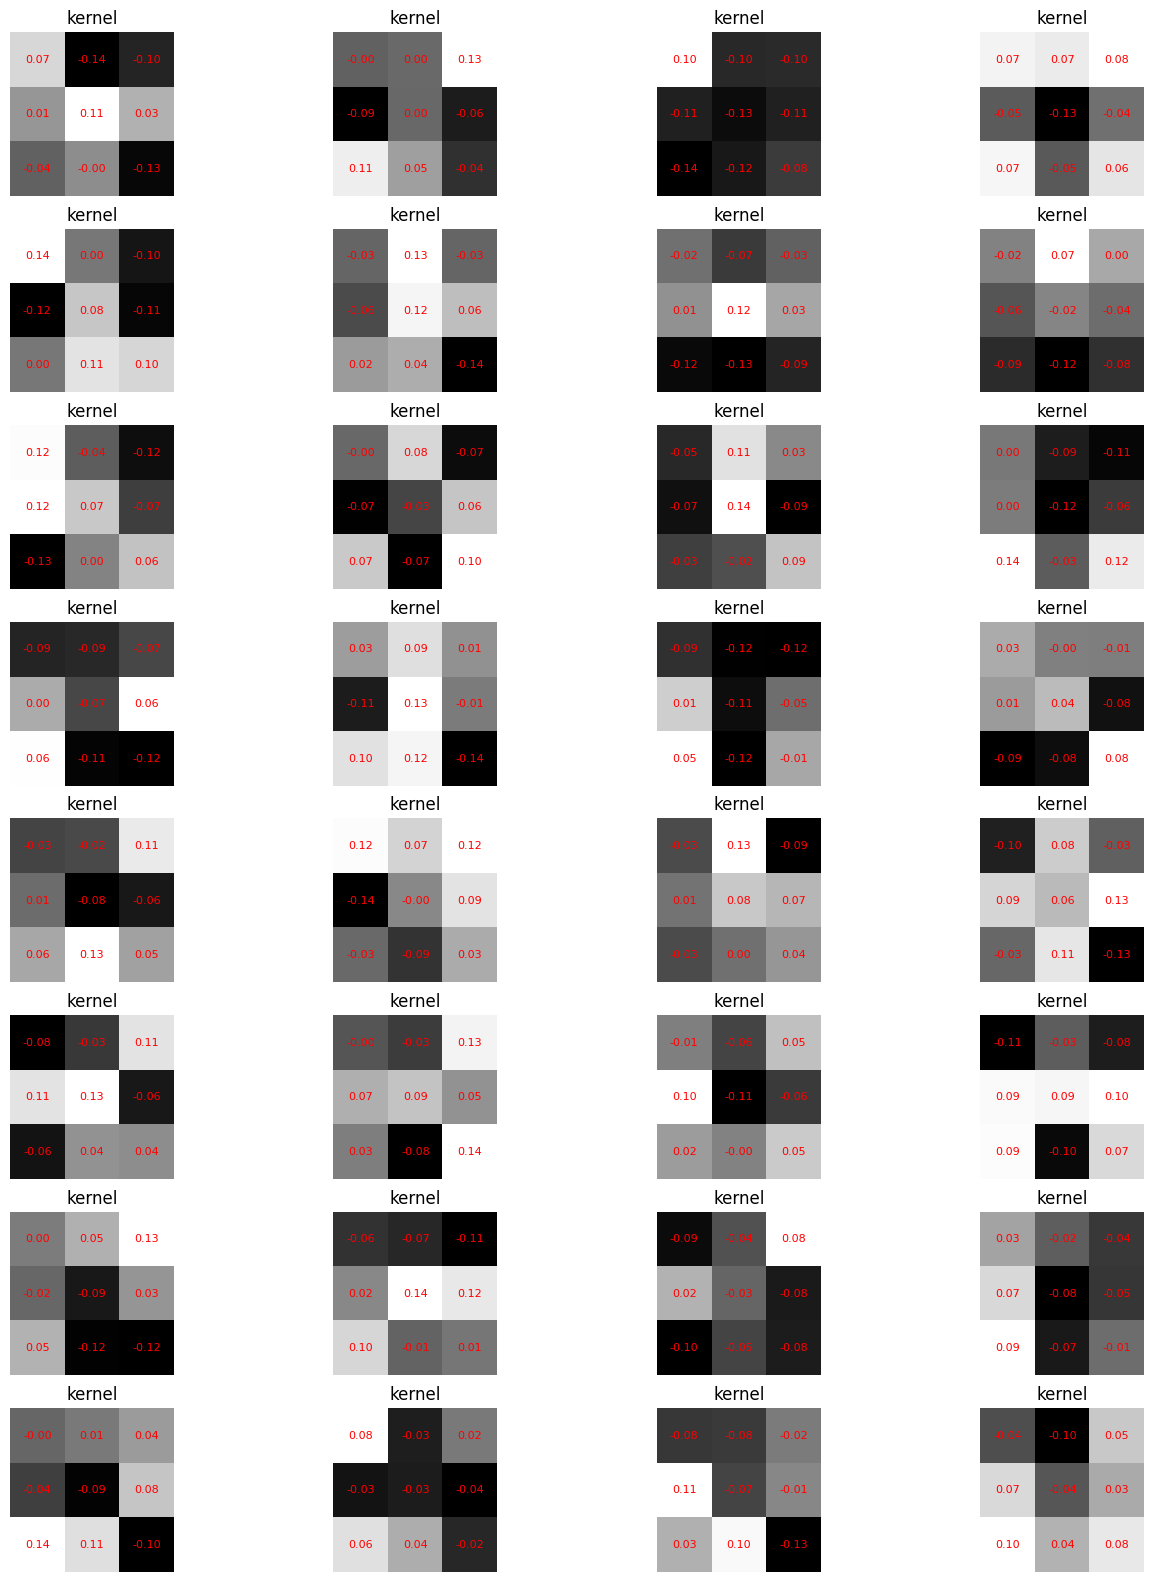

In [83]:
fig, axes = plt.subplots(8, 4, figsize=(16, 20))
num=0
for qw in range(8):
    for sa in range(4):

        ax = axes[qw,sa]
        ax.imshow(weights_init[:, :, 0, num], cmap='gray')
        ax.set_title('kernel')
        ax.axis('off')
        for (i, j), val in np.ndenumerate(weights_init[:, :, 0, num]):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
        num+=1
plt.show()

In [84]:
for i in range(32):
    mean = np.mean(weights_init[:, :, 0, i])
    variance = np.var(weights_init[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_init[i])
    variance = np.var(bias_init[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('32.txt', weights_init, bias_init, 'Before Training')
save_model_weights('32_weights.txt', weights_init, bias_init, 'Before Training')

Conv Layer 1 Weights:
Mean: -0.0220184326171875
Variance: 0.006803340278565884
Conv Layer 1 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: 0.010930740274488926
Variance: 0.004818002227693796
Conv Layer 2 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 3 Weights:
Mean: -0.08721804618835449
Variance: 0.00451476639136672
Conv Layer 3 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 4 Weights:
Mean: 0.009346678853034973
Variance: 0.005278071388602257
Conv Layer 4 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 5 Weights:
Mean: 0.013127420097589493
Variance: 0.009221162647008896
Conv Layer 5 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 6 Weights:
Mean: 0.011451325379312038
Variance: 0.006482806522399187
Conv Layer 6 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 7 Weights:
Mean: -0.03167455643415451
Variance: 0.00551

In [85]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_full, y_full, epochs=2, callbacks=[WeightsCallback()])

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8926 - loss: 2.2835
Epoch 1:
Weights:
[[[[ 9.86211468e-03 -3.19924168e-02  4.70897593e-02  2.46924610e-04
     3.05294599e-02 -7.91628733e-02 -4.41957191e-02 -8.67143180e-03
     1.73699148e-02 -3.73047218e-02 -9.27477255e-02 -4.09968235e-02
    -7.22910315e-02 -2.89584342e-02 -8.61207098e-02  9.69317649e-03
    -4.65627573e-02  3.60695249e-03 -7.27750883e-02 -1.31656095e-01
    -1.10278025e-01 -3.24944146e-02 -4.40260954e-02 -1.35392204e-01
    -1.06204953e-02 -9.31650996e-02 -1.25169963e-01 -5.65375015e-03
    -1.60066392e-02  1.18106361e-02 -7.99932405e-02 -6.46090433e-02]]

  [[-1.74132645e-01 -4.71819155e-02 -5.32419756e-02 -1.85014750e-03
    -5.42666987e-02  4.65602763e-02 -8.82835612e-02  5.22176810e-02
    -8.44124407e-02  3.29648927e-02  3.14332470e-02 -1.12464294e-01
    -8.19624215e-02  1.96035244e-02 -1.24298058e-01 -3.51189543e-03
    -5.77469692e-02 -6.79717353e-03  6.89567551e-02  2.08643861e-02
    -7.7

In [86]:
weights_final=(model.layers[0].get_weights()[0])
bias_final=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_final}")
print(f"Bias:\n{bias_final}")

Weights:
[[[[-1.93874352e-03 -3.00118681e-02  4.14811894e-02 -1.61241658e-03
     2.47868206e-02 -8.22732970e-02 -4.61423695e-02 -2.15842272e-03
     1.90655217e-02 -3.71060409e-02 -9.49082971e-02 -4.42051217e-02
    -7.66526461e-02 -2.45613754e-02 -8.61207098e-02  3.98418307e-03
    -4.35529016e-02 -3.62485065e-03 -6.28051087e-02 -1.29232526e-01
    -1.07281573e-01 -3.32050994e-02 -4.38434631e-02 -1.33156225e-01
    -1.50124282e-02 -8.25414285e-02 -1.43996254e-01  7.73558486e-03
    -1.29065923e-02  5.99658862e-03 -6.91835210e-02 -6.56493530e-02]]

  [[-1.86425865e-01 -4.37605269e-02 -4.06837985e-02 -3.96479806e-03
    -5.18287234e-02  4.15335447e-02 -7.99102187e-02  4.68101688e-02
    -6.03388809e-02  4.78102602e-02  3.08399871e-02 -1.11975141e-01
    -1.16695069e-01  2.14949027e-02 -1.24298058e-01  7.51165848e-04
    -5.40367588e-02 -1.72098968e-02  7.54412189e-02  2.30351370e-02
    -7.62240142e-02 -5.07563129e-02 -7.47405887e-02 -5.41255176e-02
     7.26338942e-03 -6.04180135e-02 

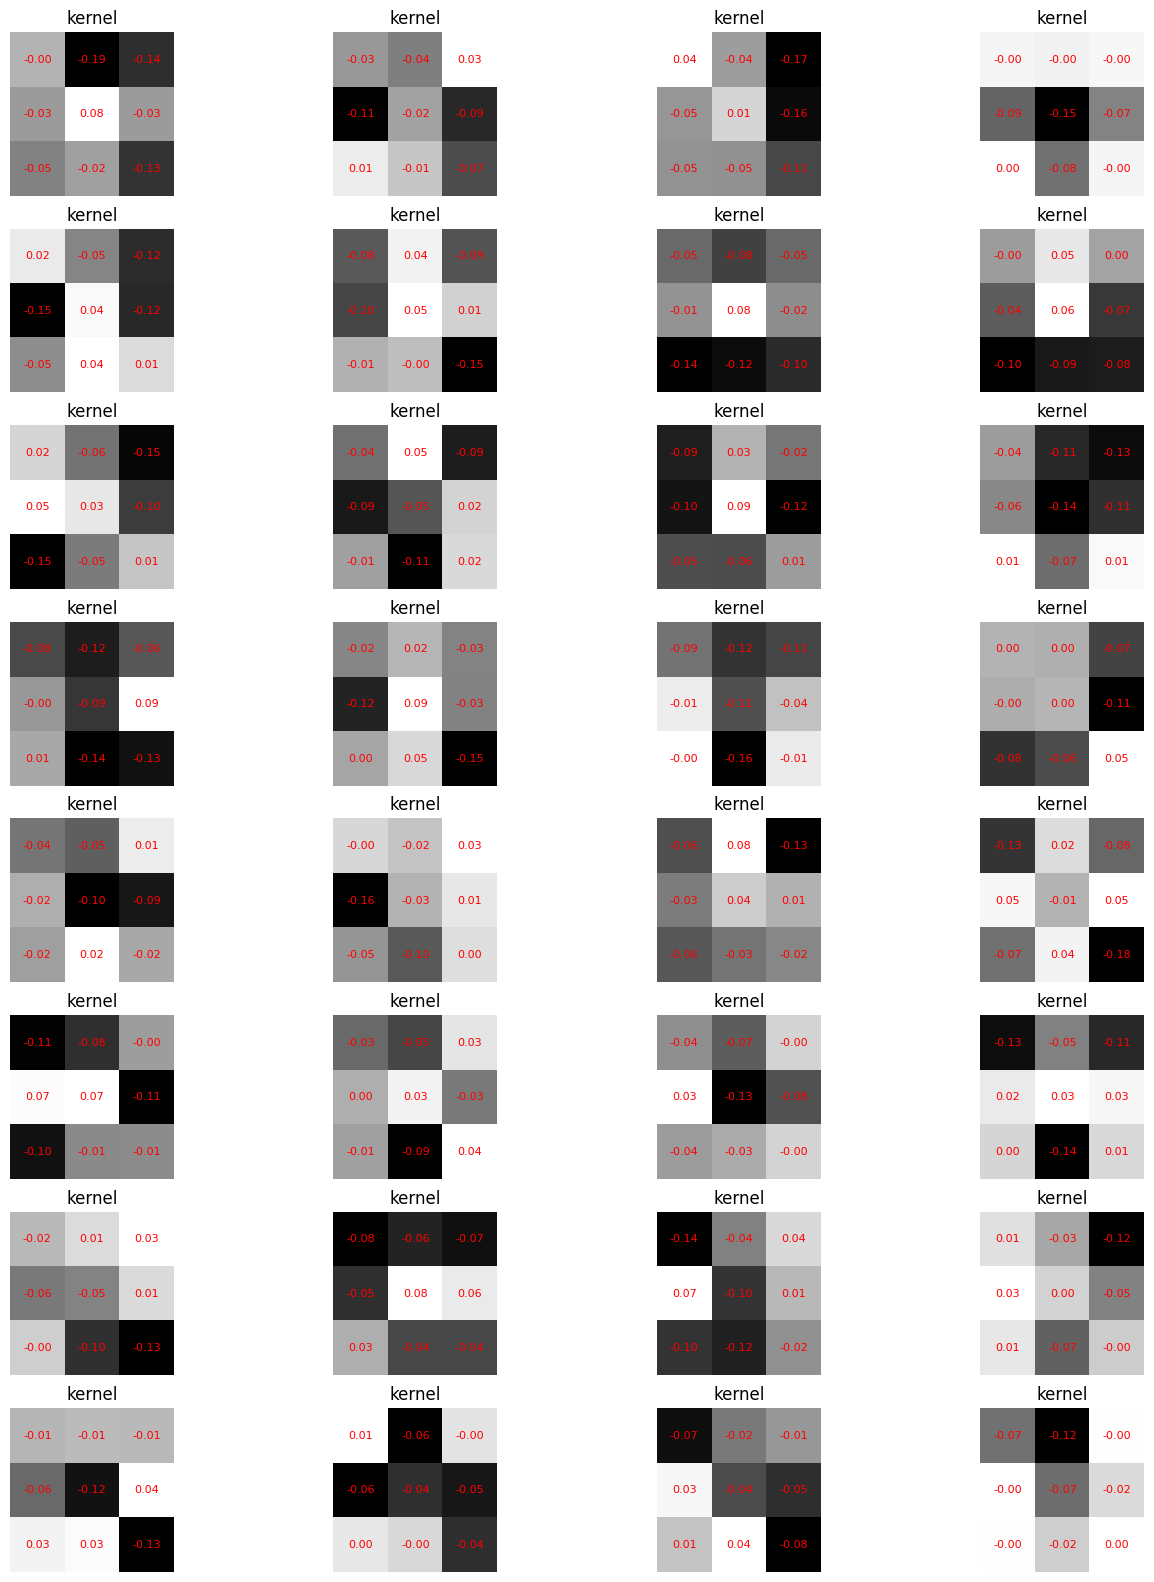

In [87]:
fig, axes = plt.subplots(8, 4, figsize=(16, 20))
num=0
for qw in range(8):
    for sa in range(4):

        ax = axes[qw,sa]
        ax.imshow(weights_final[:, :, 0, num], cmap='gray')
        ax.set_title('kernel')
        ax.axis('off')
        for (i, j), val in np.ndenumerate(weights_final[:, :, 0, num]):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
        num+=1
plt.show()

In [88]:
for i in range(32):
    mean = np.mean(weights_final[:, :, 0, i])
    variance = np.var(weights_final[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_final[i])
    variance = np.var(bias_final[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

# save_model_statistics('32.txt', weights_final, bias_final, 'After Training')
# save_model_weights('32_weights.txt', weights_final, bias_final, 'After Training')
save_kernel_comparison_images('32.png', weights_init, weights_final)

Conv Layer 1 Weights:
Mean: -0.05727206915616989
Variance: 0.005872656125575304
Conv Layer 1 Biases:
Mean: -0.01665000431239605
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: -0.037477221339941025
Variance: 0.0019410406239330769
Conv Layer 2 Biases:
Mean: -0.07416176050901413
Variance: 0.0
------------------------------
Conv Layer 3 Weights:
Mean: -0.06488862633705139
Variance: 0.004540618974715471
Conv Layer 3 Biases:
Mean: -0.008486630395054817
Variance: 0.0
------------------------------
Conv Layer 4 Weights:
Mean: -0.04317088425159454
Variance: 0.00266927108168602
Conv Layer 4 Biases:
Mean: -0.10895082354545593
Variance: 0.0
------------------------------
Conv Layer 5 Weights:
Mean: -0.04169295355677605
Variance: 0.005017613526433706
Conv Layer 5 Biases:
Mean: -0.10475722700357437
Variance: 0.0
------------------------------
Conv Layer 6 Weights:
Mean: -0.03637504577636719
Variance: 0.004442882724106312
Conv Layer 6 Biases:
Mean: -0.05255858600139618
Varia

In [89]:
test_loss, test_acc = model.evaluate(x_test_full, y_test_full)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9650 - loss: 0.1299
Test accuracy: 0.9700000286102295


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


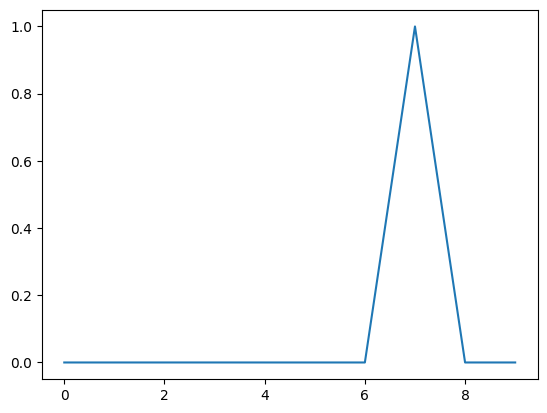

In [90]:
predictions = model.predict(x_test_full)
plt.plot((predictions[0])) 


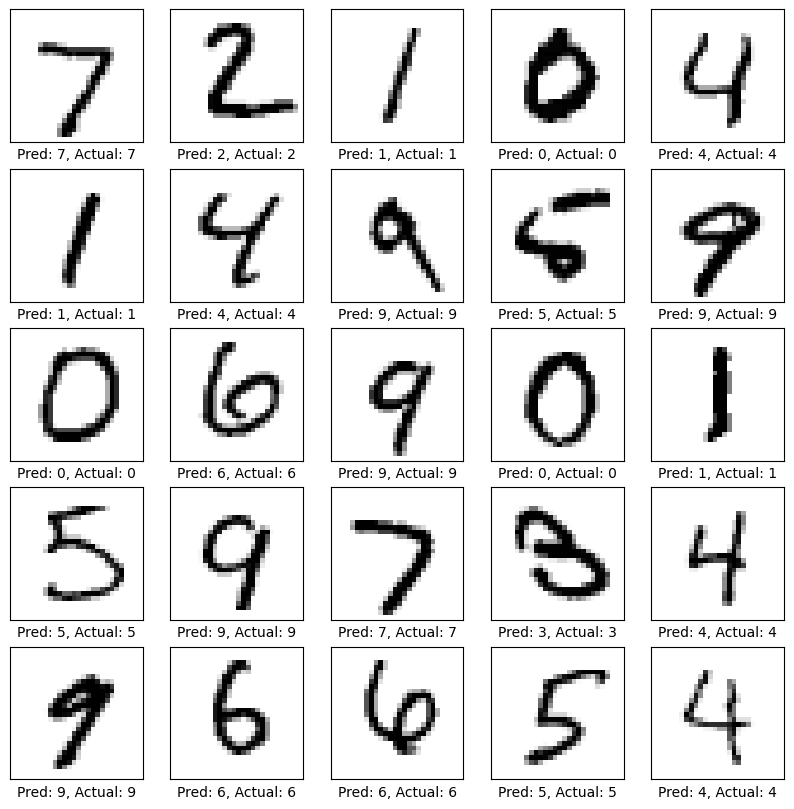

In [91]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_full[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test_full[i])}")
plt.show()


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

image = x_test_full[0]
image = image[:, :, 0]

kernel = weights_final[:,:,0,1]

print(kernel)
print(image.shape)

[[-0.03001187 -0.04376053  0.02546357]
 [-0.11217677 -0.02476185 -0.09024116]
 [ 0.01473189 -0.00540708 -0.07113119]]
(28, 28)


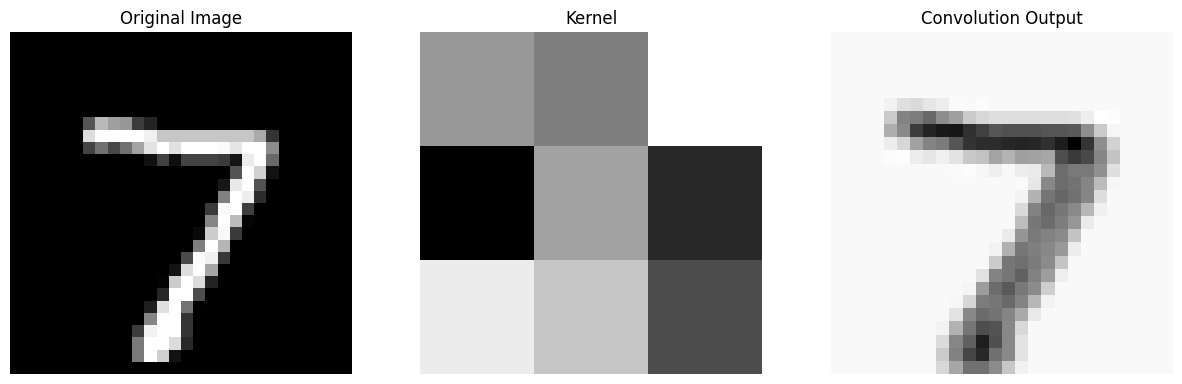

In [93]:


# Perform the convolution operation with no padding and stride of 1
convolved_output = convolve2d(image, kernel, mode='valid')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image, cmap='gray', interpolation='none')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel
axs[1].imshow(kernel, cmap='gray', interpolation='none')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolution output
axs[2].imshow(convolved_output, cmap='gray', interpolation='none')
axs[2].set_title('Convolution Output')
axs[2].axis('off')

plt.show()
